In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
data = pd.read_csv('crash_data_queensland_1_crash_locations.csv')

/tmp/ipykernel_454911/2760894780.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


<Axes: >

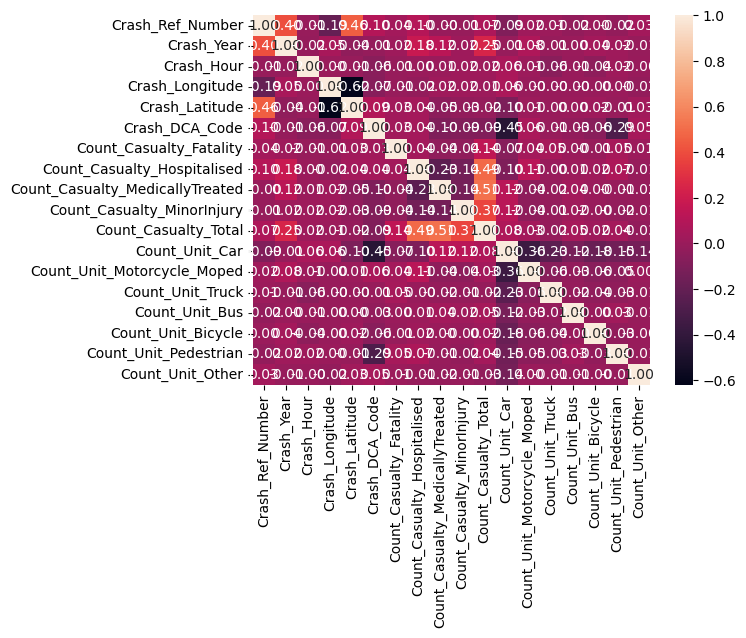

In [3]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")


In [4]:
def mtn(x):
    months = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    a = x.strip()[:3].lower()
    try:
        ez = months[a]
        return ez
    except:
        raise ValueError('Not a month')

def dy(x):
    days = {
        'mon': 1,
        'tue': 2,
        'wed': 3,
        'thu':4,
         'fri':5,
         'sat':6,
         'sun':7,
        }
    a = x.strip()[:3].lower()
    try:
        ez = days[a]
        return ez
    except:
        raise ValueError('Not a day')       
        
def sev(x):
    state = {
        'pro': 1,
        'min': 2,
        'hos': 3,
        'med':4,
         'fat':5,
        }
    a = x.strip()[:3].lower()
    try:
        ez = state[a]
        return ez
    except:
        raise ValueError('Not a state')

        
def speed(x):
    
    if x == "0 - 50 km/h":
        return 1
    if x == "60 km/h":
        return 2
    if x == "70 km/h":
        return 3
    if x == "80 - 90 km/h":
        return 4
    if x == "100 - 110 km/h":
        return 5
               

In [5]:
data['Crash_Month'] = data['Crash_Month'].apply(mtn)

In [6]:
data['Crash_Day_Of_Week'] = data['Crash_Day_Of_Week'].apply(dy)

In [7]:
data['Crash_Speed_Limit'] = data['Crash_Speed_Limit'].apply(speed)

In [8]:
data['Crash_Severity'] = data['Crash_Severity'].apply(sev)

In [9]:
one_hot = pd.get_dummies(data['Crash_Nature'])
data = data.drop('Crash_Nature', axis=1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Type'])

one_hot['Hit_pedestrian']= one_hot['Hit pedestrian']
one_hot = one_hot.drop('Hit pedestrian', axis=1)
one_hot = one_hot.drop('Other', axis =1)
data = data.drop('Crash_Type', axis=1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Loc_ABS_Remoteness'])
data = data.drop('Loc_ABS_Remoteness', axis=1)
data = data.join(one_hot)
 

data = data.drop('Other', axis=1)
one_hot = pd.get_dummies(data['Crash_Controlling_Authority'])
data = data.drop('Crash_Controlling_Authority', axis=1)
data = data.join(one_hot)


one_hot = pd.get_dummies(data['Crash_Roadway_Feature'])
data = data.drop('Crash_Roadway_Feature', axis=1)
one_hot = one_hot.drop('Other', axis =1)
data = data.join(one_hot)

data = data.drop('Other', axis=1)
data = data.drop('Miscellaneous', axis=1)
data = data.drop('No Roadway Feature', axis=1)

one_hot = pd.get_dummies(data['Crash_Traffic_Control'])

data = data.drop('Crash_Traffic_Control', axis=1)
one_hot = one_hot.drop('Miscellaneous', axis=1)
one_hot = one_hot.drop('Other', axis =1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Road_Surface_Condition'])
data = data.drop('Crash_Road_Surface_Condition', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Atmospheric_Condition'])
data = data.drop('Crash_Atmospheric_Condition', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Road_Horiz_Align'])
data = data.drop('Crash_Road_Horiz_Align', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Road_Vert_Align'])
data = data.drop('Crash_Road_Vert_Align', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['DCA_Key_Approach_Dir'])
data = data.drop('DCA_Key_Approach_Dir', axis=1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['Crash_Lighting_Condition'])
data = data.drop('Crash_Lighting_Condition', axis=1)
one_hot = one_hot.drop('Unknown', axis =1)
data = data.join(one_hot)


In [10]:
data = data.drop('Crash_Street', axis=1)
data = data.drop('Crash_Street_Intersecting', axis=1)
data = data.drop('State_Road_Name', axis=1)
data = data.drop('Loc_Post_Code', axis=1)
data = data.drop('Loc_Queensland_Transport_Region', axis=1)
data = data.drop('Loc_Police_Division', axis=1)
data = data.drop('Loc_Main_Roads_Region', axis=1)
data = data.drop('Loc_ABS_Statistical_Area_2', axis=1)
data = data.drop('Loc_ABS_Statistical_Area_4', axis=1)
data = data.drop('Loc_State_Electorate', axis=1)
data = data.drop('Loc_Federal_Electorate', axis=1)
data = data.drop('Count_Casualty_MedicallyTreated', axis=1)
data = data.drop('Count_Casualty_MinorInjury', axis=1)
data = data.drop('Count_Casualty_Total', axis=1)
data = data.drop('Crash_Ref_Number', axis=1)

data = data.drop('Loc_Suburb', axis=1)
data = data.drop('Loc_Local_Government_Area', axis=1)
data = data.drop('Loc_Police_Region', axis=1)
data = data.drop('Loc_Police_District', axis=1)
data = data.drop('Loc_ABS_Statistical_Area_3', axis=1)
data = data.drop('Crash_DCA_Code', axis=1)
data = data.drop('Crash_DCA_Description', axis=1)
data = data.drop('Crash_DCA_Group_Description', axis=1)
data = data.drop('Count_Casualty_Fatality', axis=1)
data = data.drop('Count_Casualty_Hospitalised', axis=1)

data = data.drop('Count_Unit_Car', axis=1)
data = data.drop('Count_Unit_Motorcycle_Moped', axis=1)
data = data.drop('Count_Unit_Truck', axis=1)
data = data.drop('Count_Unit_Bus', axis=1)
data = data.drop('Count_Unit_Bicycle', axis=1)
data = data.drop('Count_Unit_Pedestrian', axis=1)
data = data.drop('Count_Unit_Other', axis=1)


In [11]:
data

,Crash_Severity,Crash_Year,Crash_Month,Crash_Day_Of_Week,Crash_Hour,Crash_Longitude,Crash_Latitude,Crash_Speed_Limit,Angle,Collision - miscellaneous,...,E,N,P,S,U,W,Darkness - Lighted,Darkness - Not lighted,Dawn/Dusk,Daylight
0,3,2001,1,1,6,153.052207,-27.586358,1.0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,2001,1,3,9,153.064920,-27.595907,2.0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2,2001,1,4,8,153.058444,-27.599409,2.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,2001,1,7,8,153.081083,-27.598882,2.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,2001,1,2,16,0.000009,-0.000010,2.0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367225,4,2018,7,5,9,153.007314,-27.438193,2.0,0,0,...,0,0,0,1,0,0,0,0,0,1
367226,4,2018,7,6,16,152.997975,-27.424132,2.0,1,0,...,0,0,0,1,0,0,0,0,0,1
367227,3,2018,7,1,19,153.006921,-27.440713,2.0,0,0,...,0,1,0,0,0,0,0,0,1,0
367228,4,2018,7,2,8,152.874980,-27.377406,4.0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
data.columns

Index(['Crash_Severity', 'Crash_Year', 'Crash_Month', 'Crash_Day_Of_Week',
       'Crash_Hour', 'Crash_Longitude', 'Crash_Latitude', 'Crash_Speed_Limit',
       'Angle', 'Collision - miscellaneous', 'Fall from vehicle', 'Head-on',
       'Hit animal', 'Hit object', 'Hit parked vehicle', 'Hit pedestrian',
       'Non-collision - miscellaneous', 'Overturned', 'Rear-end', 'Sideswipe',
       'Struck by external load', 'Struck by internal load', 'Multi-Vehicle',
       'Single Vehicle', 'Hit_pedestrian', 'Inner Regional', 'Major Cities',
       'Outer Regional', 'Remote', 'Unknown', 'Very Remote',
       'Locally-controlled', 'Not coded', 'State-controlled', 'Bikeway',
       'Bridge/Causeway', 'Forestry/National Park Road',
       'Intersection - 5+ way', 'Intersection - Cross',
       'Intersection - Interchange', 'Intersection - Multiple Road',
       'Intersection - Roundabout', 'Intersection - T-Junction',
       'Intersection - Y-Junction', 'Median Opening', 'Merge Lane',
       'Rai

In [15]:
data

,Crash_Severity,Crash_Year,Crash_Month,Crash_Day_Of_Week,Crash_Hour,Crash_Longitude,Crash_Latitude,Crash_Speed_Limit,Angle,Collision - miscellaneous,...,E,N,P,S,U,W,Darkness - Lighted,Darkness - Not lighted,Dawn/Dusk,Daylight
0,3,2001,1,1,6,153.052207,-27.586358,1.0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,2001,1,3,9,153.064920,-27.595907,2.0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2,2001,1,4,8,153.058444,-27.599409,2.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,2001,1,7,8,153.081083,-27.598882,2.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,2001,1,2,16,0.000009,-0.000010,2.0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367225,4,2018,7,5,9,153.007314,-27.438193,2.0,0,0,...,0,0,0,1,0,0,0,0,0,1
367226,4,2018,7,6,16,152.997975,-27.424132,2.0,1,0,...,0,0,0,1,0,0,0,0,0,1
367227,3,2018,7,1,19,153.006921,-27.440713,2.0,0,0,...,0,1,0,0,0,0,0,0,1,0
367228,4,2018,7,2,8,152.874980,-27.377406,4.0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
a = data.corr()